The difference between **convolutional codes** and the **Viterbi algorithm** lies in their roles and purposes in a communication system:

---

### **1. Convolutional Codes**
- **What it is**:
  - A **convolutional code** is a type of error-correcting code used to encode data for transmission over noisy channels.
  - It introduces redundancy by encoding input data into output sequences using a memory-based process.

- **Purpose**:
  - To improve the reliability of data transmission by adding redundancy, enabling the receiver to detect and correct errors.

- **How it works**:
  - Encoding involves **shift registers** and **generator polynomials** to create output bits as a function of current and past input bits.
  - Example of an encoding process:
    - Input bits: $u = [1, 0, 1]$
    - Output (encoded): $v = [11, 10, 01, \dots]$

- **Key Parameters**:
  - **Constraint Length** ($K$): The memory length of the encoder.
  - **Code Rate** ($R = \frac{k}{n}$): The ratio of input bits ($k$) to output bits ($n$).
  - **Generator Polynomials**: Define the relationships between input and output.

---

### **2. Viterbi Algorithm**
- **What it is**:
  - The **Viterbi algorithm** is a decoding algorithm used to determine the most likely sequence of transmitted bits from the received noisy encoded sequence.
  - It is specifically designed for **maximum likelihood decoding** of convolutional codes.

- **Purpose**:
  - To decode convolutionally encoded data by finding the most likely path through a **trellis diagram** that represents the encoder's state transitions.

- **How it works**:
  - Uses a **trellis structure**:
    - Each node in the trellis corresponds to a possible state of the encoder.
    - Transitions between states represent possible input-output combinations.
  - Computes and tracks:
    - **Path Metric**: A measure of how well the received sequence matches the expected sequence for a given path.
    - **Survivor Path**: The most likely sequence of states leading to the current state.
  - Selects the path with the smallest metric as the decoded output.

---

### **Key Differences**

| **Aspect**               | **Convolutional Codes**                                     | **Viterbi Algorithm**                             |
|--------------------------|------------------------------------------------------------|--------------------------------------------------|
| **Type**                 | Error-correcting code (encoding mechanism).                | Decoding algorithm for convolutional codes.      |
| **Role**                 | Adds redundancy to the transmitted data for error correction. | Decodes the redundant data to retrieve original input. |
| **Operation**            | Encodes input bits into output sequences.                  | Decodes received noisy sequences into input bits. |
| **Implementation**       | Uses shift registers and generator polynomials.            | Uses a trellis structure and dynamic programming. |
| **Output**               | Encoded sequence (e.g., $v = [11, 10, \dots]$).        | Most likely transmitted input sequence (e.g., $u = [1, 0, 1]$). |
| **Computational Complexity** | Encoding is simple and linear.                          | Decoding can be computationally intensive for large constraint lengths. |

---

### **How They Work Together**
1. **Encoding with Convolutional Codes**:
   - At the transmitter, input bits are convolutionally encoded to produce a redundant sequence that can withstand noise during transmission.

2. **Decoding with the Viterbi Algorithm**:
   - At the receiver, the Viterbi algorithm is used to decode the noisy received sequence, leveraging the redundancy introduced by the convolutional code to correct errors.

---

### **Example**
- **Convolutional Encoding**:
  - Generator polynomials: $g_1 = 101$, $g_2 = 111$ (constraint length = 3).
  - Input: $u = [1, 0, 1, 1]$.
  - Encoded output: $v = [11, 01, 10, 11]$.

- **Decoding with Viterbi**:
  - Received (noisy): $r = [11, 00, 10, 11]$.
  - The Viterbi algorithm reconstructs the most likely input sequence $u = [1, 0, 1, 1]$ by analyzing the trellis and minimizing error metrics.

---

### **Conclusion**
- **Convolutional codes** are the method for encoding data with redundancy.
- The **Viterbi algorithm** is the decoding process to recover the original data from the noisy encoded transmission.

Would you like further details on how either convolutional codes or the Viterbi algorithm works, perhaps with step-by-step examples?

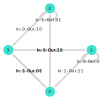

In [1]:
using Graphs
using GraphPlot

# Parameters
constraint_length = 3  # Memory size (K)
states = 2^(constraint_length - 1)  # Number of states
generator_polynomials = [0b101, 0b111]  # Generator polynomials in binary
inputs = [0, 1]  # Possible input bits

# Function to compute next state and output
function next_state_output(current_state, input_bit, generators, constraint_length)
    # Update the state: Shift the input bit into the state register
    next_state = ((current_state << 1) | input_bit) & (2^(constraint_length - 1) - 1)
    # Calculate the output bits based on generator polynomials
    output = [count_ones((current_state << 1 | input_bit) & g) % 2 for g in generators]
    return next_state, output
end

# Create graph for the trellis
g = SimpleDiGraph(states)  # Graph with states and transitions
edge_labels = []  # Store edge labels in a vector

# Build the trellis graph
for current_state in 0:(states - 1)
    for input_bit in inputs
        next_state, output = next_state_output(current_state, input_bit, generator_polynomials, constraint_length)
        add_edge!(g, current_state + 1, next_state + 1)  # +1 to make states 1-indexed for Graphs.jl
        push!(edge_labels, "In: $input_bit, Out:$(join(output))")
    end
end

# Plot the trellis
gplot(
    g,
    nodelabel=1:states,
    edgelabel=edge_labels,
    layout=circular_layout
)

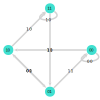

In [2]:
using Graphs
using GraphPlot

# Define the state transition graph
# 4 states: "00", "01", "10", "11"
state_labels = ["00", "01", "10", "11"]
g = DiGraph(4)  # Directed graph with 4 nodes

# Add transitions between states (source -> target with labels)
# Edge format: (source, target, label)
transitions = [
    (1, 1, "00"),  # 00 -> 00
    (1, 3, "11"),  # 00 -> 10
    (2, 1, "11"),  # 01 -> 00
    (2, 3, "00"),  # 01 -> 10
    (3, 2, "01"),  # 10 -> 01
    (3, 4, "10"),  # 10 -> 11
    (4, 2, "10"),  # 11 -> 01
    (4, 4, "10")   # 11 -> 11
]

# Add edges to the graph
for (src, dst, label) in transitions
    add_edge!(g, src, dst)
end

# Create edge labels in the same order as edges were added
edge_labels = [label for (_, _, label) in transitions]

# Plot the graph using a circular layout
gplot(
    g,
    nodelabel=state_labels,  # Node labels
    edgelabel=edge_labels,   # Edge labels
    layout=circular_layout,  # Layout function
    nodesize=0.2,            # Size of nodes
    nodelabelsize=8,         # Font size for node labels
    edgelabelsize=7          # Font size for edge labels
)

The example relates to the **weight distribution of convolutional codes**, where terms represent codewords with specific weights of symbols in certain categories, such as $L$, $I$, and $D$. This is commonly encountered in the **weight enumerator polynomial** or **input-output weight enumerators** used in coding theory.

Here’s an explanation in the context of convolutional codes:

---

### **Weight Distribution in Convolutional Codes**

The **weight enumerator polynomial** describes the distribution of weights of codewords generated by a convolutional encoder. Each term in the polynomial represents a contribution to the code's weight spectrum.

#### **Expression Structure**
$P(L, I, D) = \sum c_{k,m,n} \cdot L^k \cdot I^m \cdot D^n$
Where:
- $L^k$: Represents the **number of input bits** $k$ contributing to the codeword.
- $I^m$: Represents the **number of information symbols** (or Hamming weight of the input sequence).
- $D^n$: Represents the **Hamming weight** $n$ of the output codeword.
- $c_{k,m,n}$: Coefficients representing the number of such codewords.

---

### **Example**

#### Polynomial Given:
$4L^3I^2D^5 + 3L^6I^3D^5 = 7D^5$

#### Interpretation:
1. The first term $4L^3I^2D^5$:
   - $L^3$: Input of length 3 contributes.
   - $I^2$: Hamming weight of the input is 2.
   - $D^5$: Hamming weight of the output is 5.
   - Coefficient $4$: There are 4 such codewords.

2. The second term $3L^6I^3D^5$:
   - $L^6$: Input of length 6 contributes.
   - $I^3$: Hamming weight of the input is 3.
   - $D^5$: Hamming weight of the output is 5.
   - Coefficient $3$: There are 3 such codewords.

3. Combined $D^5$:
   - These terms describe codewords with the same output weight ($D^5$) but different contributions from the input.

#### **Weight Enumeration**:
When grouped by $D^5$, you might express the total weight distribution for $D^5$ as:
$7D^5$
This represents 7 codewords in total with Hamming weight 5, though the breakdown by $L$ and $I$ differs.

---

### **Application**
- **Weight enumerator polynomials** are critical for analyzing the error-correcting performance of convolutional codes.
- They help compute the **distance spectrum** of the code, which is essential for understanding its error resilience.

---

Would you like further explanation on how these polynomials are derived, or perhaps how to compute such a polynomial for a given convolutional code?

$(PEP)_d \leq \sum_\limits{\rho = \lceil \frac{d}{2} \rceil}^d \binom{d}{\rho} \epsilon^\rho (1 - \epsilon)^{d - \rho}$

$\epsilon = \text{prob. of a specific pattern of } \rho \text{ flipped bits.}$


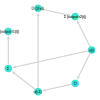

In [8]:
using Graphs
using GraphPlot
using LaTeXStrings

# Define nodes and edges based on the diagram
nodes = ["u(t)", "D", "u(t-1)", "Σ", "Σ (output r1(t))", "D (2nd)", "Σ (output r2(t))"]  # Nodes in the system

# Define a directed graph
g = DiGraph(length(nodes))

# Add edges representing the system connections
# Edges: source -> destination
edges = [
    (1, 2),  # u(t) -> D
    (2, 3),  # D -> u(t-1)
    (1, 4),  # u(t) -> Σ
    (3, 4),  # u(t-1) -> Σ
    (4, 5),  # Σ -> output r1(t)
    (3, 6),  # u(t-1) -> D (2nd)
    (6, 7),  # D (2nd) -> Σ (output r2(t))
    (1, 7)   # u(t) -> Σ (output r2(t))
]

# Add edges to the graph
for (src, dst) in edges
    add_edge!(g, src, dst)
end

# Plot the graph
gplot(
    g,
    nodelabel=nodes,       # Label nodes with system elements
    layout=circular_layout # Use a circular layout for clarity
)

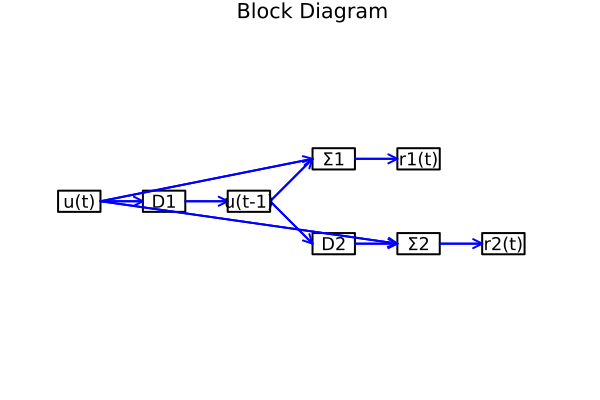

In [17]:
using Plots

# Define block positions
blocks = Dict(
    "u(t)" => (0, 2),
    "D1" => (2, 2),
    "u(t-1)" => (4, 2),
    "Σ1" => (6, 3),
    "r1(t)" => (8, 3),
    "D2" => (6, 1),
    "Σ2" => (8, 1),
    "r2(t)" => (10, 1)
)

# Arrows defining connections between components
arrows = [
    ("u(t)", "D1"),
    ("D1", "u(t-1)"),
    ("u(t)", "Σ1"),
    ("u(t-1)", "Σ1"),
    ("Σ1", "r1(t)"),
    ("u(t-1)", "D2"),
    ("D2", "Σ2"),
    ("u(t)", "Σ2"),
    ("Σ2", "r2(t)")
]

# Plot setup
plot(title="Block Diagram", xlims=(-1, 12), ylims=(-1, 5), legend=false, grid=false, ratio=1)

# Draw blocks
for (name, (x, y)) in blocks
    annotate!(x, y, text(name, :center, 12))
    plot!([x - 0.5, x + 0.5, x + 0.5, x - 0.5, x - 0.5],  # Rectangle x-coordinates
          [y - 0.25, y - 0.25, y + 0.25, y + 0.25, y - 0.25],  # Rectangle y-coordinates
          lw=2, color=:black)
end

# Draw arrows
for (src, dst) in arrows
    (x1, y1) = blocks[src]
    (x2, y2) = blocks[dst]
    # Draw arrows using a line with arrowhead markers
    plot!([x1 + 0.5, x2 - 0.5], [y1, y2]; arrow=:arrow, color=:blue, lw=2)
end

# Show the plot
plot!(axis=false)

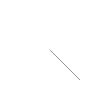

In [22]:
using Compose

draw = compose(context(),
    rectangle(0.2, 0.2, 0.6, 0.4), fill("white"),
    (context(), line([(0.5, 0.5), (0.8, 0.8)]), Compose.stroke("black"))  # Use Compose.stroke explicitly
)

draw